# Netflix Data Analysis

In this project we will provide data analysis on a dataset from Netflix.
The dataset, available on [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download) has information about TV shows and movies on Netflix till 2021.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import rcParams
from matplotlib.cm import rainbow
import matplotlib.pyplot as plt

## Load the data

In [61]:
data = pd.read_csv('netflix_titles.csv')
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.shape

(8807, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Checking for missing values
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

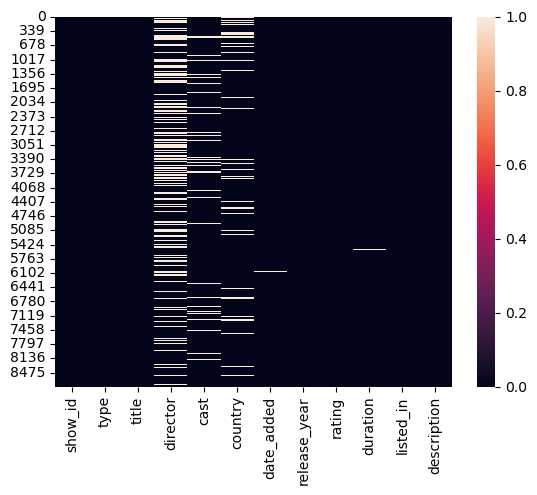

In [11]:
sns.heatmap(data.isnull())

In [10]:
# Checking for duplicate values 
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


We can see that we have no duplicated rows but we have missing values in our dataset.

## Movies vs TV Shows

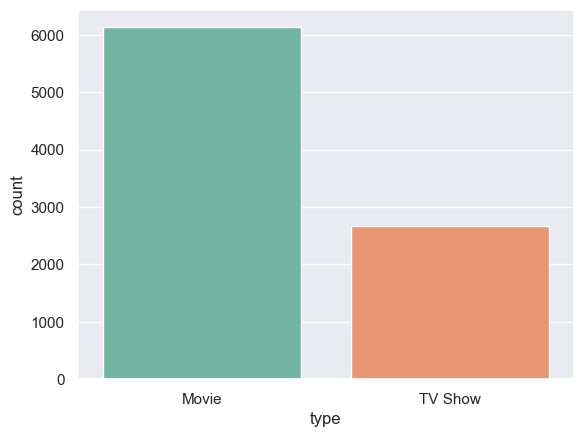

In [12]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=data, palette="Set2")

## Q1: If a producer wants to release some Tv show, which month must he do so?

We want to retrieve the month in which the least amount of TV shows are added.

In [22]:
# Select the Tv shows
tv_shows_data = data[data['type'] == 'TV Show']

# Selects the dates on which the tv shows are added
dates = tv_shows_data[['date_added']].dropna()
dates['year'] = dates['date_added'].apply(lambda x : x.split(', ')[-1])
dates['month'] = dates['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

In [23]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

In [30]:
# For each year, counts for each month the tv shows. Fill with 0 when no data is available
df = dates.groupby('year')['month'].value_counts().unstack().fillna(0)[months].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0


Text(0.5, 1.0, 'Netflix Contents Update')

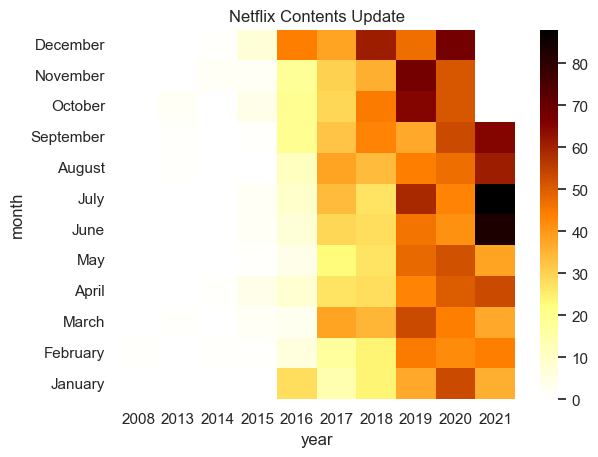

In [36]:
sns.heatmap(df, cmap='afmhot_r')
plt.title('Netflix Contents Update')

From the heatmap above we can see that, considering for example the year 2020, June and February were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release.



## Q2: Movie Rating analysis

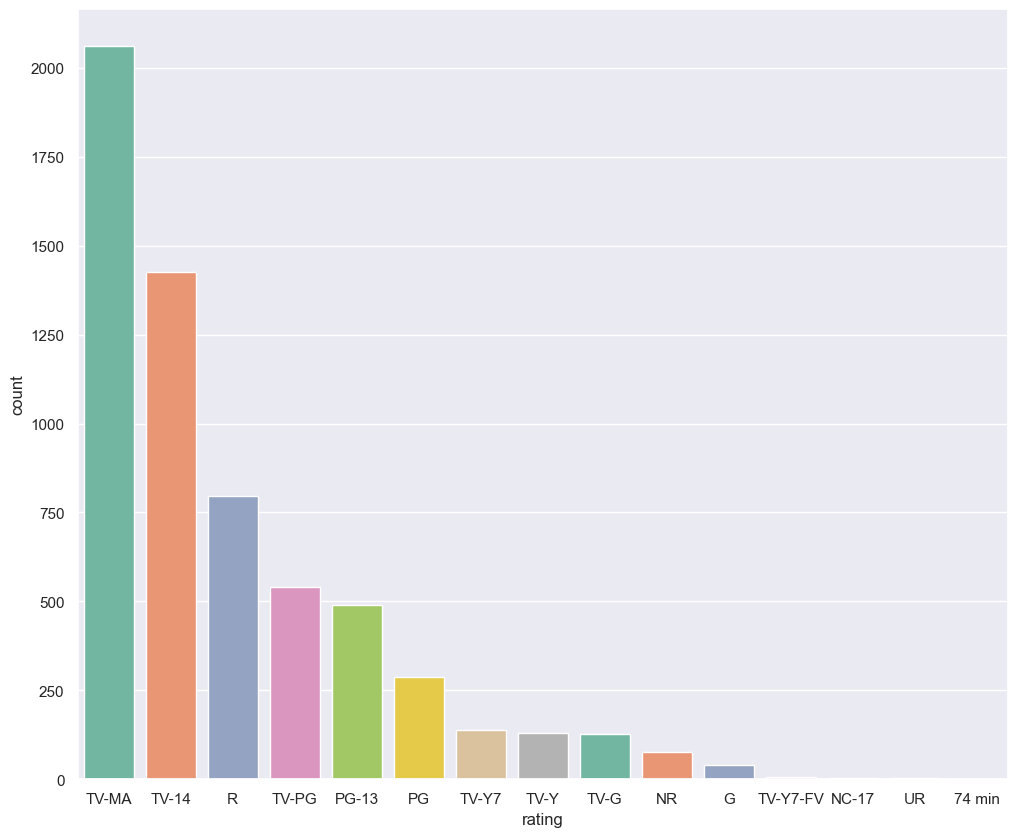

In [39]:
# Select the movies 
movies_data = data[data['type'] == 'Movie']
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=movies_data, palette="Set2", order=movies_data['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating, which is assigned to television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating. An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

## Q2: In which year were the most movies released?

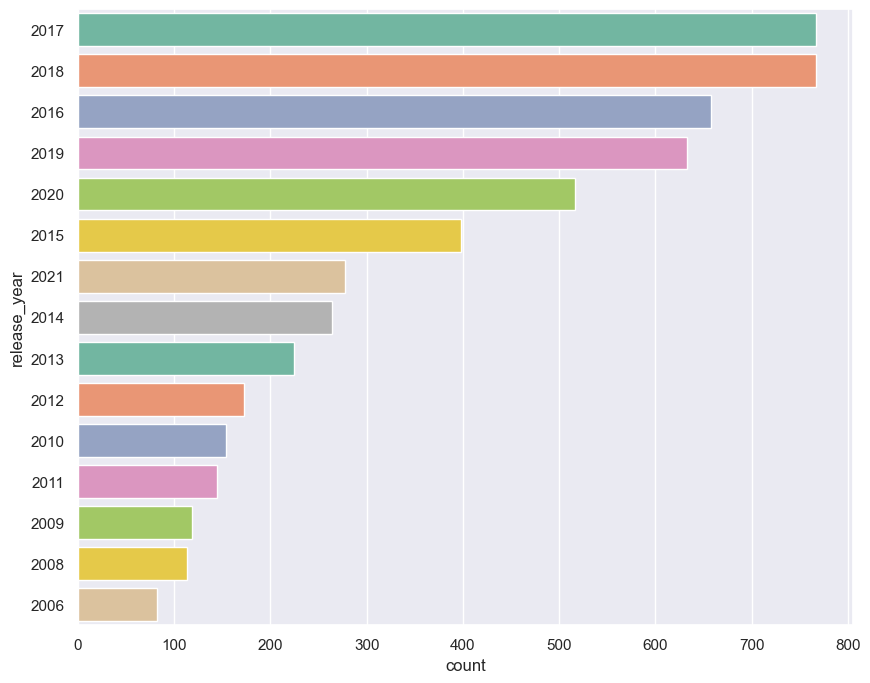

In [43]:
plt.figure(figsize=(10,8))
movies_data = data[data['type'] == 'Movie']
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=movies_data, palette="Set2", order=movies_data['release_year'].value_counts().index[0:15])

The year 2017 was the year when most of the movies were released.

## Q3: Provide the top 10 countries making movies.

In [69]:
movies_data = data[data['type'] == 'Movie']

# Selects the countries producing the movies
movies_data.fillna({'country':'Unknown'}, inplace=True)
all_countries = list(movies_data['country'])

/var/folders/wt/p6z8f48x2513vdyj3dw3zz_h0000gn/T/ipykernel_2607/2603274284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data.fillna({'country':'Unknown'}, inplace=True)


[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'India')]

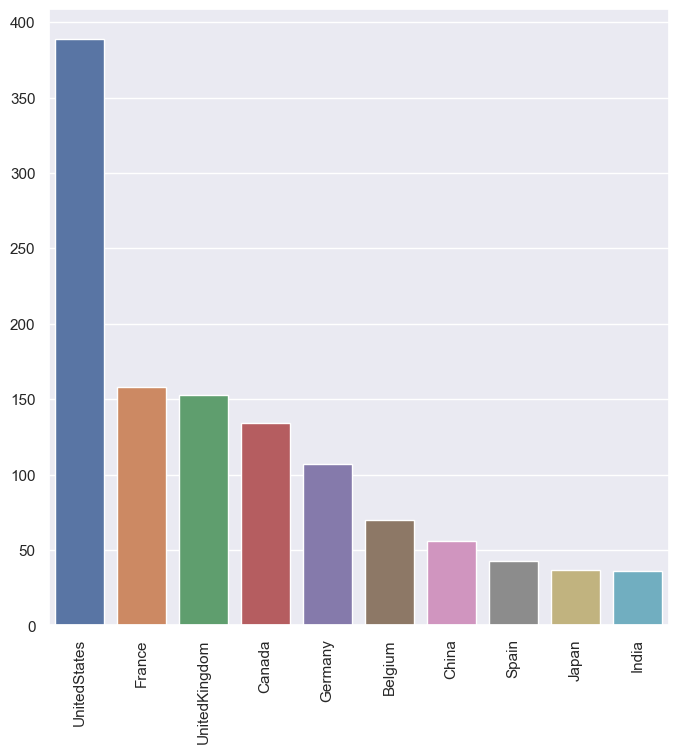

In [74]:
countries = {} # to count the movies produced 
for i in all_countries:
    i=list(i.split(',')) # since it can be a list of countries
    if len(i) == 1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

# Since we have some problems about spaces between words (ie ' United States' and 'United States' should be the same)
countries_final = {} 
for country,no in countries.items():
    country = country.replace(' ','')
    if country in list(countries_final.keys()):
        countries_final[country]+=no
    else:
        countries_final[country]=no

# Take the top 10 values in dict
countries_final = {k: v for k, v in sorted(countries_final.items(), key=lambda item: item[1], reverse= True)[:10]}

# Plot the results
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_final.keys()),y=list(countries_final.values())[0:10])
ax.set_xticklabels(list(countries_final.keys()),rotation = 90)

## Q4: Analysis movies duration.

In [87]:
movies_data = data[data['type'] == 'Movie']
movies_data = movies_data[['duration']].dropna()

In [88]:
movies_data['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6128, dtype: object

As we can see, **duration** is not in the correct form to be analyzed.

In [89]:
# Note: the duration 
movies_data['duration'] = movies_data['duration'].str.replace(' min','')
movies_data['duration'] = movies_data['duration'].astype(str).astype(int)
movies_data['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6128, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Density'>

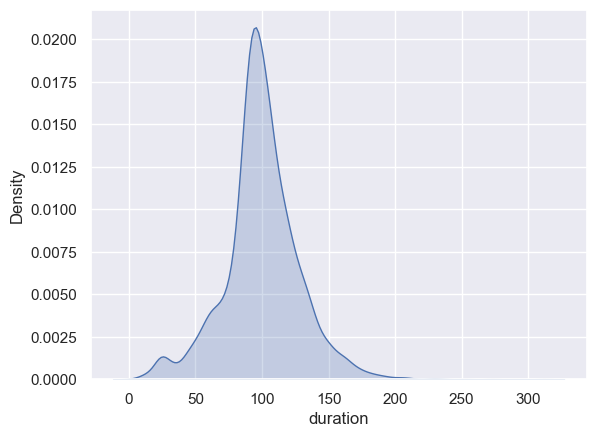

In [91]:
sns.set(style="darkgrid")
sns.kdeplot(data=movies_data['duration'], fill=True)

We can see from the plot above that a good amount of movies on Netflix are among the duration of 75-120 mins.

## Q5: Provide the TV shows with largest number of seasons.

In [101]:
tv_shows_data = data[data['type'] == 'TV Show']

# Select the titles of the tv shows and their number of seasons
durations = tv_shows_data[['title', 'duration']]
durations.rename(columns = {'duration':'n_seasons'}, inplace = True)
durations['n_seasons'] = durations['n_seasons'].str.replace(' Season','')
durations['n_seasons'] = durations['n_seasons'].str.replace('s','')
durations['n_seasons'] = durations['n_seasons'].astype(str).astype(int)


# Sort and select the top tv shows
top_tv_shows = durations.sort_values(by='n_seasons', ascending=False)
top_tv_shows

/var/folders/wt/p6z8f48x2513vdyj3dw3zz_h0000gn/T/ipykernel_2607/1958768507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations.rename(columns = {'duration':'n_seasons'}, inplace = True)
/var/folders/wt/p6z8f48x2513vdyj3dw3zz_h0000gn/T/ipykernel_2607/1958768507.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['n_seasons'] = durations['n_seasons'].str.replace(' Season','')
/var/folders/wt/p6z8f48x2513vdyj3dw3zz_h0000gn/T/ipykernel_2607/1958768507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,title,n_seasons
548,Grey's Anatomy,17
2423,Supernatural,15
4798,NCIS,15
1354,Heartland,13
4220,COMEDIANS of the world,13
...,...,...
3853,I Have a Script,1
3852,Abyss,1
3851,Unchained Fate,1
3850,The Missing Menu,1


<AxesSubplot:xlabel='title'>

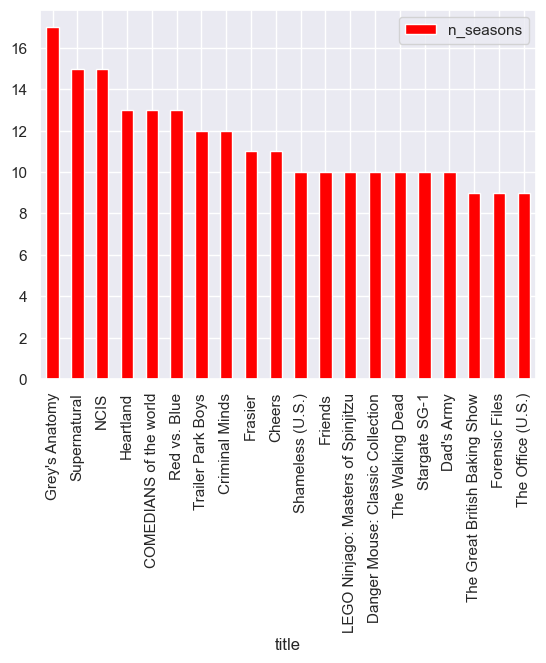

In [105]:
# Plot the results
top_tv_shows.iloc[0:20].plot(kind='bar',x='title',y='n_seasons', color='red')

## Q6: Build a Recommendation System.

We are goiing to use the The TF-IDF (Term Frequency-Inverse Document Frequency) score, the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

This recommendation is just based on the Plot.

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
data['description'] = data['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

There are about 18895 words described for the 8807 movies in this dataset.

In [107]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [108]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()

In [109]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data['title'].iloc[movie_indices]

In [110]:
# Try the recommendation system

get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object